In [25]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils import builder, metrics, grapher
import pickle
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
df = pd.read_csv('data/test_data.csv') #Get test data

feature_cols = ['hdg','ts1','lat_deg1','lon_deg1','altitude1','lat_deg2','lon_deg2','altitude2','distance_3d','wake_code'] #Poner columnas
target_cols = ['dif_t'] #Ponere target

context = df[feature_cols]
target = df[target_cols].values

In [44]:
with open('models/model_lr.plk', 'rb') as f:
    model_lr = pickle.load(f)

with open('models/model_rf.plk', 'rb') as f:
    model_rf = pickle.load(f)

with open('models/model_hgbr.plk', 'rb') as f:
    model_hgbr = pickle.load(f)

with open('models/model_xgbr.plk', 'rb') as f:
    model_xgbr = pickle.load(f)

prediction_lr = model_lr.predict(context)
prediction_rf = model_rf.predict(context)
prediction_hgbr = model_hgbr.predict(context)
prediction_xgbr = model_xgbr.predict(context)

In [46]:
rmse_lr = metrics.rmse(prediction_lr, target)
rmse_rf = metrics.rmse(prediction_rf, target)
rmse_hgbr = metrics.rmse(prediction_hgbr, target)
rmse_xgbr = metrics.rmse(prediction_xgbr, target)

ioa_lr = metrics.ioa(prediction_lr, target)
ioa_rf = metrics.ioa(prediction_rf, target)
ioa_hgbr = metrics.ioa(prediction_hgbr, target)
ioa_xgbr = metrics.ioa(prediction_xgbr, target)

bias_lr = metrics.bias(prediction_lr, target)
bias_rf = metrics.bias(prediction_rf, target)
bias_hgbr = metrics.bias(prediction_hgbr, target)
bias_xgbr = metrics.bias(prediction_xgbr, target)

score_lr = metrics.compute_score(y_prediction_seconds=prediction_lr, y_true_seconds=target)
score_rf = metrics.compute_score(y_prediction_seconds=prediction_rf, y_true_seconds=target)
score_hgbr = metrics.compute_score(y_prediction_seconds=prediction_hgbr, y_true_seconds=target)
score_xgbr = metrics.compute_score(y_prediction_seconds=prediction_xgbr, y_true_seconds=target)

with open('metrics/initial_models.txt', 'w') as f:
    
    f.write("Linear Regression:\n")
    f.write("RMSE: {}\n".format(rmse_lr))
    f.write("IoA: {}\n".format(ioa_lr))
    f.write("Bias: {}\n".format(bias_lr))
    f.write("Score: {}\n".format(score_lr))
    f.write("\n")

    f.write("Random Forest:\n")
    f.write("RMSE: {}\n".format(rmse_rf))
    f.write("IoA: {}\n".format(ioa_rf))
    f.write("Bias: {}\n".format(bias_rf))
    f.write("Score: {}\n".format(score_rf))
    f.write("\n")

    f.write("HistGradientBoostingRegressor:\n")
    f.write("RMSE: {}\n".format(rmse_hgbr))
    f.write("IoA: {}\n".format(ioa_hgbr))
    f.write("Bias: {}\n".format(bias_hgbr))
    f.write("Score: {}\n".format(score_hgbr))
    f.write("\n")

    f.write("XGBoost:\n")
    f.write("RMSE: {}\n".format(rmse_xgbr))
    f.write("IoA: {}\n".format(ioa_xgbr))
    f.write("Bias: {}\n".format(bias_xgbr))
    f.write("Score: {}\n".format(score_xgbr))
    f.write("\n")

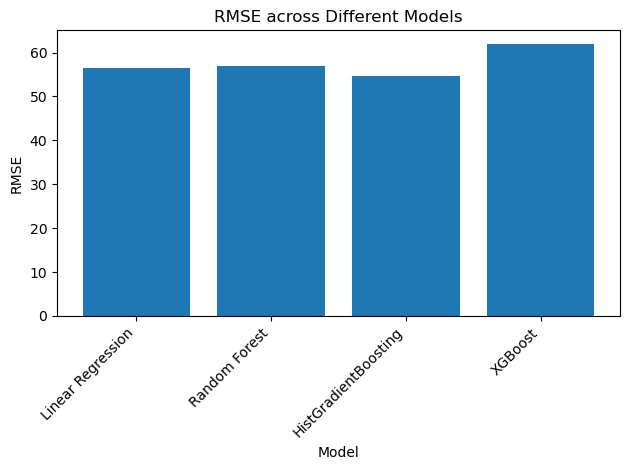

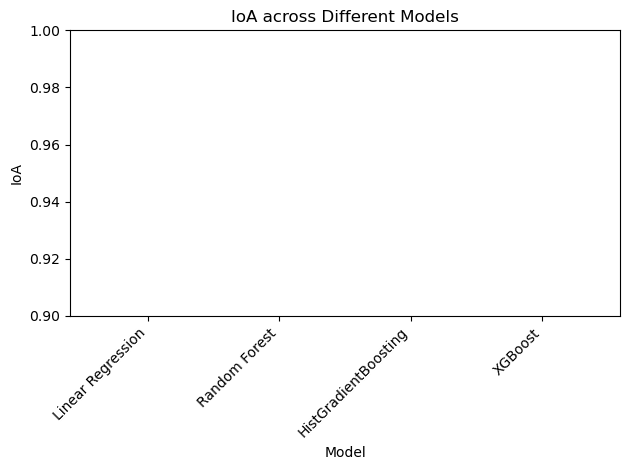

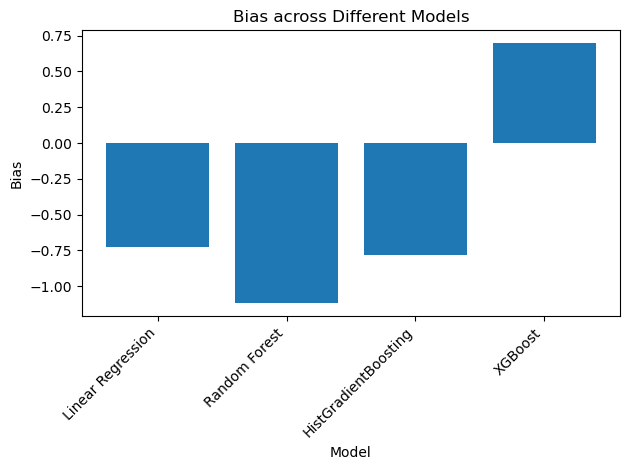

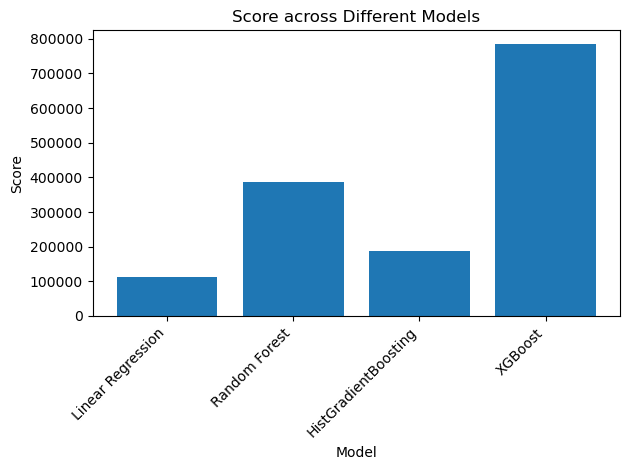

In [47]:
rmse_values = [rmse_lr, rmse_rf, rmse_hgbr, rmse_xgbr]
ioa_values = [ioa_lr, ioa_rf, ioa_hgbr, ioa_xgbr]
bias_values = [bias_lr, bias_rf, bias_hgbr, bias_xgbr]
score_values = [score_lr, score_rf, score_hgbr, score_xgbr]

score_list = [arr.item() for arr in score_values]
model_names = ['Linear Regression', 'Random Forest', 'HistGradientBoosting', 'XGBoost']

grapher.plot_metrics_bar(rmse_values, model_names, 'RMSE')

grapher.plot_metrics_bar(ioa_values, model_names, 'IoA')

grapher.plot_metrics_bar(bias_values, model_names, 'Bias')

grapher.plot_metrics_bar(score_list, model_names, 'Score')